In [26]:
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt
import geopandas
from geopandas import GeoDataFrame
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
import datetime
from matplotlib import cm
#import plotly
#plotly.offline.init_notebook_mode(connected=True)

from collections import OrderedDict

In [2]:
df_listings= pd.read_csv("listings.csv")
df_listings

id                                               name    host_id  \
0       1742654                High Floor apt.near Columbus Circle    9173924   
1      23502842                           Cozy East Village studio   34777741   
2      15984984                          Great Location by Subway!    9737900   
3      13820083   Beautiful Cozy Garden Apt- Historic Clinton Hill   31829334   
4       6170979                 Cozy 1 Bedroom apartment fitting 4   31104121   
5      27283214                  Room in Luxury Building - Midtown    3508466   
6      30712669        Safe perfect location heart of east village    7957807   
7         33014                                            NYC Zen     143048   
8      29705049  Sunny, Cozy Apt in the Heart of BedStuy for Cheap      82286   
9        867749      Sunny 2 bedroom in Prospect heights + terrace     745186   
10     15188621    Comfortable One Bedroom Apt in Prospect Heights   61842904   
11       150804                         Lower East Side 2 Bed Apt.     726333   
12     30566910                      Spacious East Village Zen Den   33531612   
13     16651879           Minimalist Vegan Room in Columbus Circle   31892037   
14      2593478                  Heart of BK - 10 min to Manhattan    4314440   
15         3831                    Cozy Entire Floor of Brownstone       4869   
16     32783365      Peaceful Sanctuary in the heart of the action   25312503   
17      1182844                 Large apt at Central Park, TimesSq    6470443   
18      1151782               GREAT 2 BR  UPPER EAST - MIN 30 DAYS    1002618   
19     19219624              Creative Retreat for Two, With Garden  134521683   
20      3552043            Zen Loft -  1600 SQ FT Loft in Brooklyn     319077   
21     19830008  Charming Private Room in the heart of East Vil...  139942077   
22     24223602                          Prospect Heights Paradise  182086879   
23     32281512  One of a kind, lovely apartment w/private back...   42483386   
24     26518779                    Tranquil East Village apartment    6072790   
25     30372287               Private Apartment near Prospect Park   11370189   
26     34331285            NYC Fantastic Apartment by Central Park   48054322   
27     30096719              Small studio in historic Clinton Hill     188896   
28     33964494  Stellar 1 Bed Walk to Central Park or Times Sq...  256463120   
29     33777679                                    Columbus Circle  254620862   
...         ...                                                ...        ...   
48911  33782555  Cute and cozy, great downtown Manhattan location!   18885469   
48912  33014529                3 BR with Private Rooftop Terrace!!  245637171   
48913   8866178                     Clean cozy and convenient stay    1596626   
48914    493177                 Two Bridges District Chinatown NYC    2436633   
48915   8548971  Reno'ed 2bed/2bath walk-up~East Village~Pristine!   23296023   
48916    292047                  Gorgeous pvt room in West Village    1490696   
48917  30941754              Shared Room By Times Square Manhattan  187975743   
48918  33474952  Spacious private bedroom in East Village / StM...   95892016   
48919  34315059    Luxury 400 Sf Apartment in the Heart of Chelsea  160754766   
48920  29163611          Luxury 4BR DUPLEX in the LES w/  backyard  219712206   
48921    854182                    Spacious Apartment with PATIO!!       7510   
48922  21423426             Peaceful 1 Bedroom in the East Village   10391716   
48923  33612815  Luxury apt on Fifth Ave in the heart of Manhattan  109701110   
48924      5216                                    Super Large APT       7510   
48925  33833022        Comfortable, convenient in the East village     107974   
48926  28977135      Private Cozy 2-Bedroom Clinton Hill Apartment  113055692   
48927  33499489              Room In Manhattan Close to Everything  251430918   
48928  31435825      Lovely 2BR, 2BATH in he

In [3]:
df_listings.shape

(48941, 16)

In [4]:
#rename the column names
df_listings=df_listings.rename(columns = {'neighbourhood_group':'borough','calculated_host_listings_count':"count_listings",'last_review':"date_reviewed"})

In [5]:
df_listings["borough"].value_counts()

Manhattan        22091
Brooklyn         19975
Queens            5493
Bronx             1033
Staten Island      349
Name: borough, dtype: int64

In [6]:
df_listings["room_type"].value_counts()

Entire home/apt    25518
Private room       22273
Shared room         1150
Name: room_type, dtype: int64

In [7]:
df_listings


id                                               name    host_id  \
0       1742654                High Floor apt.near Columbus Circle    9173924   
1      23502842                           Cozy East Village studio   34777741   
2      15984984                          Great Location by Subway!    9737900   
3      13820083   Beautiful Cozy Garden Apt- Historic Clinton Hill   31829334   
4       6170979                 Cozy 1 Bedroom apartment fitting 4   31104121   
5      27283214                  Room in Luxury Building - Midtown    3508466   
6      30712669        Safe perfect location heart of east village    7957807   
7         33014                                            NYC Zen     143048   
8      29705049  Sunny, Cozy Apt in the Heart of BedStuy for Cheap      82286   
9        867749      Sunny 2 bedroom in Prospect heights + terrace     745186   
10     15188621    Comfortable One Bedroom Apt in Prospect Heights   61842904   
11       150804                         Lower East Side 2 Bed Apt.     726333   
12     30566910                      Spacious East Village Zen Den   33531612   
13     16651879           Minimalist Vegan Room in Columbus Circle   31892037   
14      2593478                  Heart of BK - 10 min to Manhattan    4314440   
15         3831                    Cozy Entire Floor of Brownstone       4869   
16     32783365      Peaceful Sanctuary in the heart of the action   25312503   
17      1182844                 Large apt at Central Park, TimesSq    6470443   
18      1151782               GREAT 2 BR  UPPER EAST - MIN 30 DAYS    1002618   
19     19219624              Creative Retreat for Two, With Garden  134521683   
20      3552043            Zen Loft -  1600 SQ FT Loft in Brooklyn     319077   
21     19830008  Charming Private Room in the heart of East Vil...  139942077   
22     24223602                          Prospect Heights Paradise  182086879   
23     32281512  One of a kind, lovely apartment w/private back...   42483386   
24     26518779                    Tranquil East Village apartment    6072790   
25     30372287               Private Apartment near Prospect Park   11370189   
26     34331285            NYC Fantastic Apartment by Central Park   48054322   
27     30096719              Small studio in historic Clinton Hill     188896   
28     33964494  Stellar 1 Bed Walk to Central Park or Times Sq...  256463120   
29     33777679                                    Columbus Circle  254620862   
...         ...                                                ...        ...   
48911  33782555  Cute and cozy, great downtown Manhattan location!   18885469   
48912  33014529                3 BR with Private Rooftop Terrace!!  245637171   
48913   8866178                     Clean cozy and convenient stay    1596626   
48914    493177                 Two Bridges District Chinatown NYC    2436633   
48915   8548971  Reno'ed 2bed/2bath walk-up~East Village~Pristine!   23296023   
48916    292047                  Gorgeous pvt room in West Village    1490696   
48917  30941754              Shared Room By Times Square Manhattan  187975743   
48918  33474952  Spacious private bedroom in East Village / StM...   95892016   
48919  34315059    Luxury 400 Sf Apartment in the Heart of Chelsea  160754766   
48920  29163611          Luxury 4BR DUPLEX in the LES w/  backyard  219712206   
48921    854182                    Spacious Apartment with PATIO!!       7510   
48922  21423426             Peaceful 1 Bedroom in the East Village   10391716   
48923  33612815  Luxury apt on Fifth Ave in the heart of Manhattan  109701110   
48924      5216                                    Super Large APT       7510   
48925  33833022        Comfortable, convenient in the East village     107974   
48926  28977135      Private Cozy 2-Bedroom Clinton Hill Apartment  113055692   
48927  33499489              Room In Manhattan Close to Everything  251430918   
48928  31435825      Lovely 2BR, 2BATH in he

In [8]:
df_listings["price"].isnull().sum()

0

In [9]:
df_listings.columns.to_list()

['id',
 'name',
 'host_id',
 'host_name',
 'borough',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'date_reviewed',
 'reviews_per_month',
 'count_listings',
 'availability_365']

Text(0.5, 1.0, 'Histogram of price')

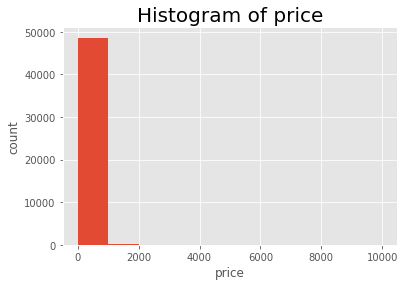

In [27]:
import seaborn as sns
df_listings['price'].hist() # to get the distribution of the price 

plt.xlabel('price')
plt.ylabel('count')
plt.title('Histogram of price', fontsize=20)

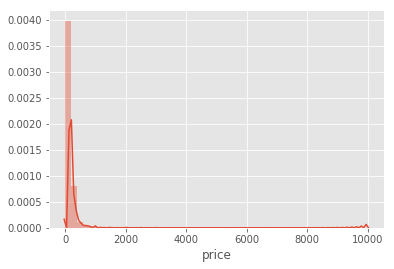

In [28]:
sns.distplot(df_listings.price)

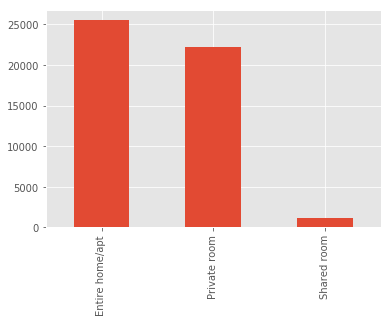

In [29]:
#total number of room type in all the boroughs
df_listings["room_type"].value_counts().plot.bar()

In [13]:
type("last_review")

str

In [14]:
#convert last_review to date format
df_listings['date_reviewed'] = pd.to_datetime(df_listings['date_reviewed'])
       
df_listings['year'] = df_listings['date_reviewed'].dt.year
#df_listings['year']=df_listings['year'].fillna("No year")
df_listings['month'] = df_listings['date_reviewed'].dt.month
#df_listings['month'] = df_listings['month'].fillna("NO month")
#df_listings['year']=df_listings['year'].astype(int)

In [15]:
df_listings

id                                               name    host_id  \
0       1742654                High Floor apt.near Columbus Circle    9173924   
1      23502842                           Cozy East Village studio   34777741   
2      15984984                          Great Location by Subway!    9737900   
3      13820083   Beautiful Cozy Garden Apt- Historic Clinton Hill   31829334   
4       6170979                 Cozy 1 Bedroom apartment fitting 4   31104121   
5      27283214                  Room in Luxury Building - Midtown    3508466   
6      30712669        Safe perfect location heart of east village    7957807   
7         33014                                            NYC Zen     143048   
8      29705049  Sunny, Cozy Apt in the Heart of BedStuy for Cheap      82286   
9        867749      Sunny 2 bedroom in Prospect heights + terrace     745186   
10     15188621    Comfortable One Bedroom Apt in Prospect Heights   61842904   
11       150804                         Lower East Side 2 Bed Apt.     726333   
12     30566910                      Spacious East Village Zen Den   33531612   
13     16651879           Minimalist Vegan Room in Columbus Circle   31892037   
14      2593478                  Heart of BK - 10 min to Manhattan    4314440   
15         3831                    Cozy Entire Floor of Brownstone       4869   
16     32783365      Peaceful Sanctuary in the heart of the action   25312503   
17      1182844                 Large apt at Central Park, TimesSq    6470443   
18      1151782               GREAT 2 BR  UPPER EAST - MIN 30 DAYS    1002618   
19     19219624              Creative Retreat for Two, With Garden  134521683   
20      3552043            Zen Loft -  1600 SQ FT Loft in Brooklyn     319077   
21     19830008  Charming Private Room in the heart of East Vil...  139942077   
22     24223602                          Prospect Heights Paradise  182086879   
23     32281512  One of a kind, lovely apartment w/private back...   42483386   
24     26518779                    Tranquil East Village apartment    6072790   
25     30372287               Private Apartment near Prospect Park   11370189   
26     34331285            NYC Fantastic Apartment by Central Park   48054322   
27     30096719              Small studio in historic Clinton Hill     188896   
28     33964494  Stellar 1 Bed Walk to Central Park or Times Sq...  256463120   
29     33777679                                    Columbus Circle  254620862   
...         ...                                                ...        ...   
48911  33782555  Cute and cozy, great downtown Manhattan location!   18885469   
48912  33014529                3 BR with Private Rooftop Terrace!!  245637171   
48913   8866178                     Clean cozy and convenient stay    1596626   
48914    493177                 Two Bridges District Chinatown NYC    2436633   
48915   8548971  Reno'ed 2bed/2bath walk-up~East Village~Pristine!   23296023   
48916    292047                  Gorgeous pvt room in West Village    1490696   
48917  30941754              Shared Room By Times Square Manhattan  187975743   
48918  33474952  Spacious private bedroom in East Village / StM...   95892016   
48919  34315059    Luxury 400 Sf Apartment in the Heart of Chelsea  160754766   
48920  29163611          Luxury 4BR DUPLEX in the LES w/  backyard  219712206   
48921    854182                    Spacious Apartment with PATIO!!       7510   
48922  21423426             Peaceful 1 Bedroom in the East Village   10391716   
48923  33612815  Luxury apt on Fifth Ave in the heart of Manhattan  109701110   
48924      5216                                    Super Large APT       7510   
48925  33833022        Comfortable, convenient in the East village     107974   
48926  28977135      Private Cozy 2-Bedroom Clinton Hill Apartment  113055692   
48927  33499489              Room In Manhattan Close to Everything  251430918   
48928  31435825      Lovely 2BR, 2BATH in he

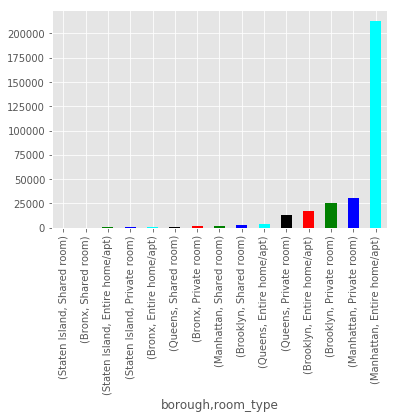

In [30]:
#number of listings for each borough and roomtype

group_borough_room=df_listings.groupby(["borough","room_type"])["count_listings"].sum().sort_values(ascending=True).plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'])
group_borough_room

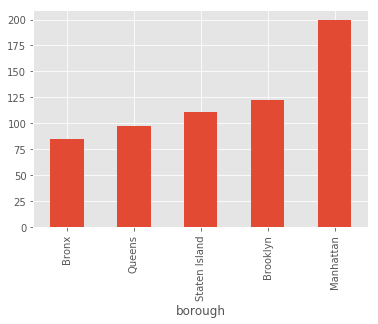

In [31]:
#Average price for each borough
borough_group=df_listings.groupby("borough")["price"].mean().sort_values(ascending=True).plot(kind="bar")
borough_group

Text(0, 0.5, 'Borough_room_type')

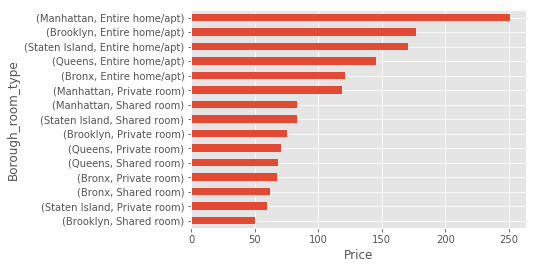

In [32]:
# Average Price of each roomtype for each borough
group_room_type=df_listings.groupby(["borough","room_type"])["price"].mean().sort_values(ascending=True).plot(kind="barh")

plt.xlabel("Price")
plt.ylabel("Borough_room_type")

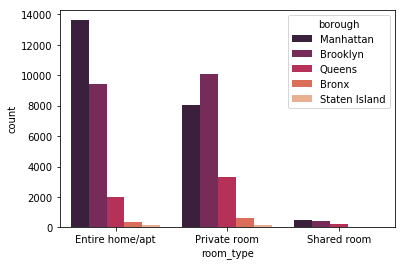

In [19]:
#Count of room type for listing  according to borough
ax = sns.countplot(x="room_type", hue="borough", palette="rocket",data=df_listings)

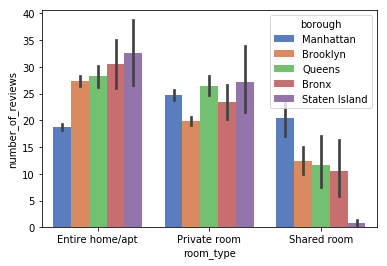

In [20]:
#number of reviews for roomtype of each borough
ax = sns.barplot(x="room_type", y="number_of_reviews",hue="borough",palette="muted", data=df_listings)

Text(0, 0.5, 'Number of reviews')

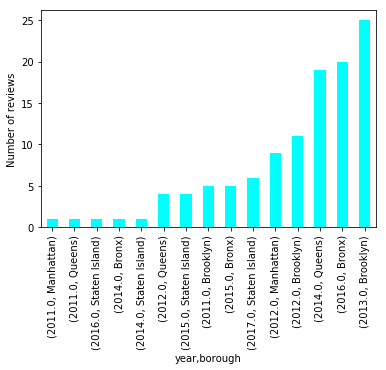

In [21]:
#number of reviews by year and borough
df_listings.groupby(["year","borough"])["number_of_reviews"].count().sort_values(ascending=True).head(15).plot.bar(color="cyan")
plt.ylabel("Number of reviews")



Text(0, 0.5, 'Number of Listings')

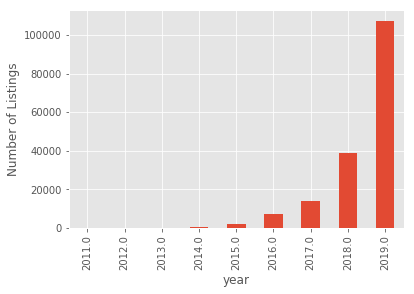

In [33]:
#Total number of reviews by year 
df_listings.groupby("year")["count_listings"].sum().plot.bar()
plt.xlabel("year")
plt.ylabel("Number of Listings")


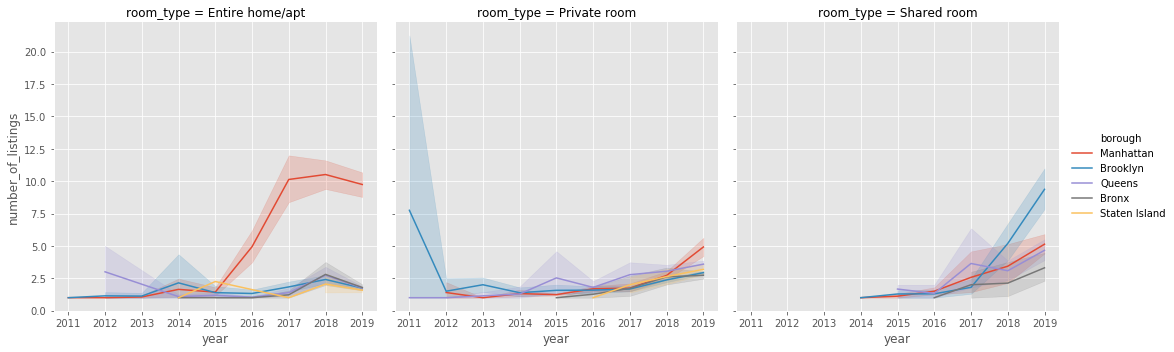

In [34]:
#number of listings according to each year and borough
df_listings["year"].dropna()
g = sns.relplot(x="year", y="count_listings", hue="borough",
               col="room_type",kind = "line", data=df_listings)

#labels for x and y axis
g.set_axis_labels("year", "number_of_listings")

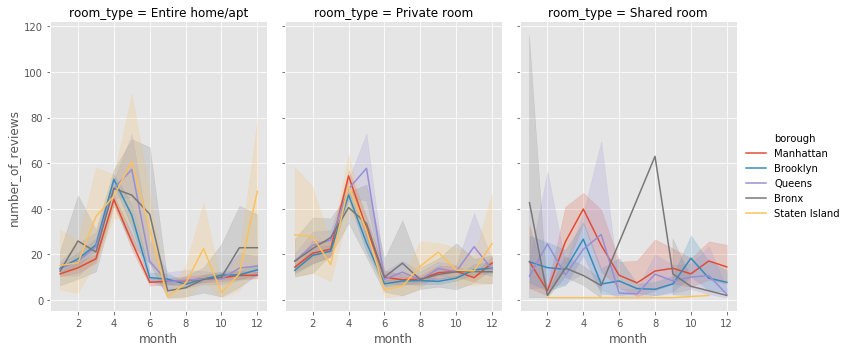

In [35]:
#number of reviews according to each month and borough
sns.relplot(x="month", y="number_of_reviews", hue="borough",
            col="room_type",kind="line", height=5, aspect=.7,data=df_listings);

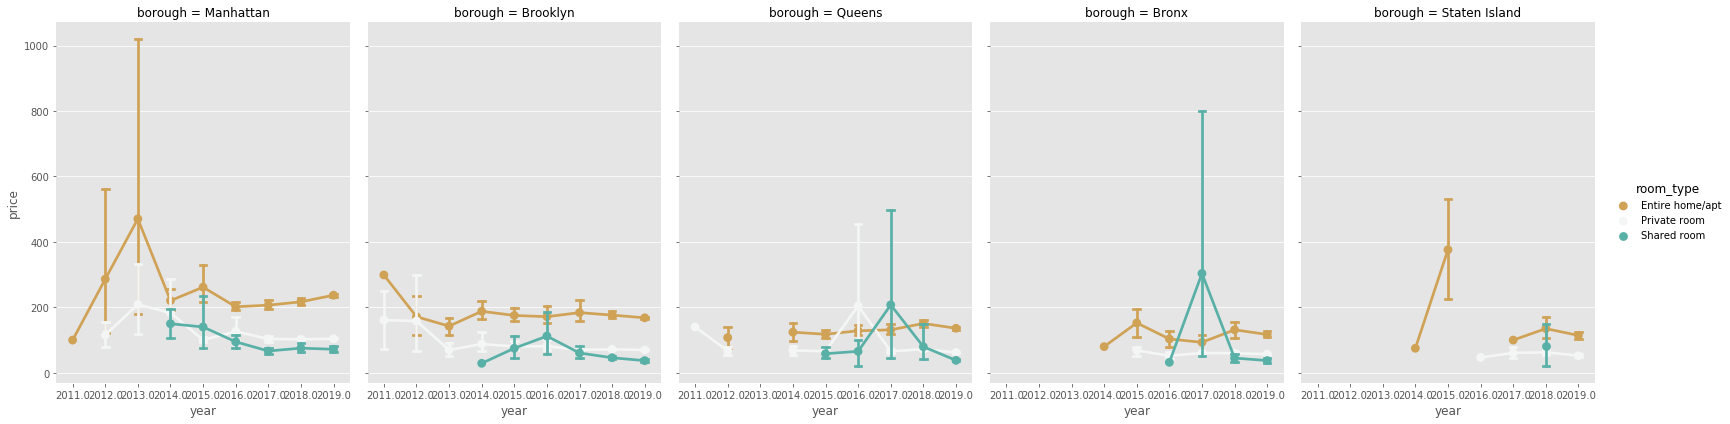

In [36]:
#price according to each year for all boroughs for each type of room
g = sns.catplot(x="year", y="price", hue="room_type", col="borough",
                capsize=.2, palette="BrBG", height=6, aspect=.75,
                kind="point", data=df_listings)
g.despine(left=True)

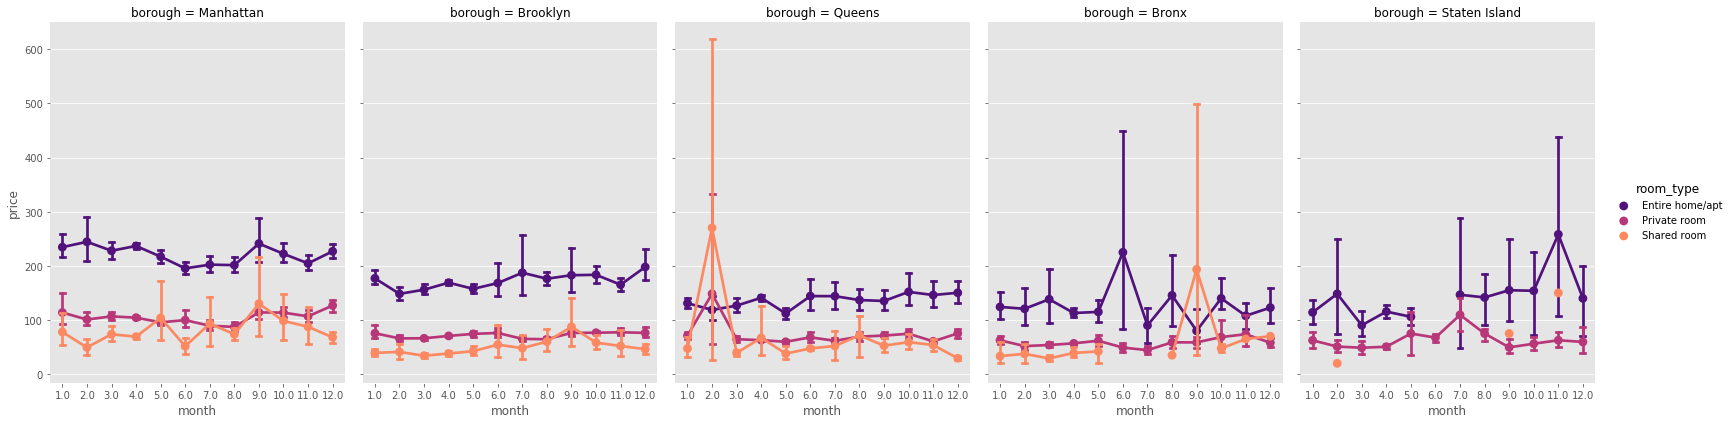

In [37]:
#price according to each month for each borough for each type of room
g = sns.catplot(x="month", y="price", hue="room_type", col="borough",
                capsize=.2, palette="magma", height=6, aspect=.75,
                kind="point", data=df_listings)
g.despine(left=True)

In [38]:
#Creating dataframe for Manhattan borough
df_borough_M=df_listings.dropna()
df_borough_M=df_borough_M[df_borough_M.borough=="Manhattan"]
df_borough_M.sort_values('price',ascending=False).dropna()[["neighbourhood","price","minimum_nights","number_of_reviews",
                                                            "room_type"]]

neighbourhood  price  minimum_nights  number_of_reviews  \
18318     Lower East Side   9999              99                  6   
21172         East Harlem   9999               5                  1   
35369             Tribeca   8500              30                  2   
36360     Upper West Side   6000              14                 17   
2220               Harlem   5000               1                  2   
48849              Nolita   5000               1                  2   
14357   Greenwich Village   3900              30                  7   
34724   Greenwich Village   3800              30                  2   
19863        East Village   3000               2                 24   
26656     Upper West Side   3000              30                  8   
16493              Nolita   2990               2                 59   
36938                SoHo   2750               2                 19   
17396            Gramercy   2750              30                 36   
7869               Harlem   2500               3                 10   
29140             Midtown   2500              30                  4   
13057     Upper West Side   2500              40                 17   
35994             Tribeca   2400               1                  2   
27548     Upper East Side   2300               3                 32   
23987      Hell's Kitchen   2200               2                  6   
28521     Lower East Side   2000               1                 18   
13938      Hell's Kitchen   2000               1                  4   
35773             Tribeca   2000               1                  1   
16809        West Village   2000               1                  2   
11793             Midtown   2000               2                  2   
39699    Theater District   2000               1                  3   
15908     Upper West Side   2000               4                  2   
32846     Upper West Side   2000              30                 59   
26341             Midtown   2000              30                  4   
23522     Upper West Side   2000              30                 30   
26772     Upper West Side   2000              30                  9   
...                   ...    ...             ...                ...   
45747  Washington Heights     28               2                 19   
41366              Harlem     27              28                  7   
3057   Washington Heights     27               3                 31   
45232  Washington Heights     27              29                  1   
47451              Harlem     27               2                  5   
5028   Washington Heights     26              30                  1   
24628              Harlem     25               1                  9   
43718              Harlem     25               2                  2   
39176  Washington Heights     25               1                  2   
173    Washington Heights     25               3                 29   
44634              Harlem     25               2                 96   
41719              Harlem     25               3                 54   
39858  Washington Heights     25               1                 45   
8272   Washington Heights     22               3                 28   
20048              Inwood     22               1                 13   
10238              Harlem     22              10                  3   
20764              Nolita     20              14                  9   
7580   Washington Heights     20               1                  2   
40031  Washington Heights     20               2                 15   
24727              Harlem     20               1                108   
23886     Upper East Side     16               2                 18   
14078                SoHo     16               3                  3   
39016              Harlem     16               2                 36   
33285      Hell's Kitchen     10               1                  2   
18568     Upper East Side     10    

Text(0, 0.5, 'Manhattan neighborhood')

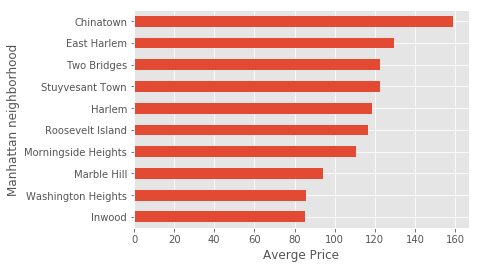

In [39]:
#What is the average price of room according to Manhattan and its neighborhood ?
df_Manhattan_Price=df_borough_M.groupby("neighbourhood")["price"].mean().sort_values(ascending=True).head(10)
df_Manhattan_Price.plot(kind='barh')
plt.xlabel('Averge Price')
plt.ylabel('Manhattan neighborhood')

Text(0, 0.5, 'Manhattan neighborhood')

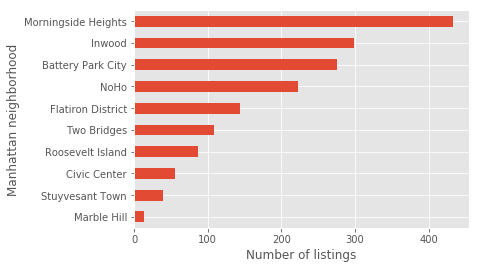

In [40]:
#What is the number of listings of room according to Manhattan and its neighborhood ?
df_Manhattan_Price=df_borough_M.groupby("neighbourhood")["count_listings"].sum().sort_values(ascending=True).head(10)
df_Manhattan_Price.plot(kind='barh')
plt.xlabel('Number of listings')
plt.ylabel('Manhattan neighborhood')

Text(0, 0.5, 'Manhattan neighborhood')

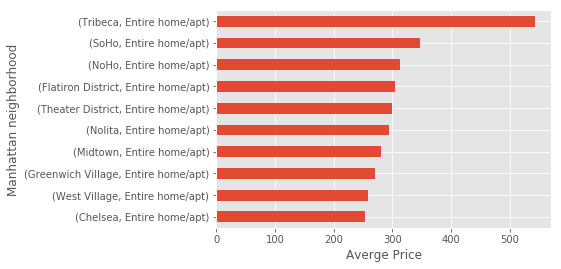

In [41]:
#What is the average price of room type according to Manhattan and its neighborhood ?
df_Manhattan_Price=df_borough_M.groupby(["neighbourhood","room_type"])["price"].mean().nlargest(10).sort_values()
df_Manhattan_Price.plot(kind='barh')
plt.xlabel('Averge Price')
plt.ylabel('Manhattan neighborhood')

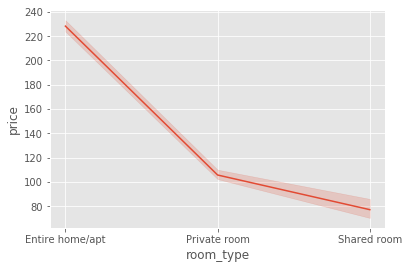

In [42]:
#which type of room has highest price for Manhattan borough
sns.lineplot(x='room_type', y='price', data=df_borough_M)

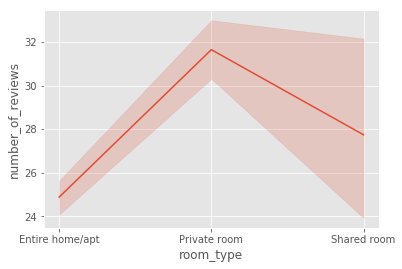

In [43]:
#which type of room has more reviews for Manhattan borough
sns.lineplot(x='room_type', y='number_of_reviews', data=df_borough_M)

Entire room/apt in Manhattan has most reviews

In [44]:
#Creating dataframe for Queens borough
df_borough_Q=df_listings.dropna()
df_borough_Q=df_borough_Q[df_borough_Q.borough=="Queens"]
df_borough_Q.sort_values('price',ascending=False).dropna()[["neighbourhood","price","minimum_nights","number_of_reviews",
                                                            "room_type"]]

neighbourhood  price  minimum_nights  number_of_reviews  \
31724              Astoria  10000             100                  2   
34332              Astoria   1800               3                  5   
48504     Long Island City   1250               1                  1   
10353            Briarwood   1000               2                  5   
33322         Forest Hills    900               1                112   
11821              Astoria    850               2                 19   
7677         East Elmhurst    700               1                  1   
20398     Long Island City    650               2                 38   
43227     Ditmars Steinway    600               2                  5   
19179              Astoria    600              30                  1   
35825     Long Island City    600               2                  1   
2066               Arverne    550               1                  1   
42512       Rockaway Beach    545               1                 27   
10843         Forest Hills    509               5                  7   
8893               Arverne    500               1                 11   
48530              Astoria    500               3                  3   
32611             Flushing    500               2                 18   
30770              Astoria    500               2                 15   
39773             Woodside    500               1                 10   
9048               Jamaica    485               1                 17   
44818             Woodside    475               1                  7   
35548             Flushing    460               2                 39   
23510              Arverne    450               2                 24   
4271               Arverne    450               3                 12   
24173             Woodside    425               1                 11   
44851              Arverne    400               1                  5   
5038         College Point    400               2                 46   
30596     Long Island City    400               3                  3   
23764             Elmhurst    400               2                 11   
41288            Ridgewood    400               3                  1   
...                    ...    ...             ...                ...   
19578             Glendale     25               1                 84   
19530             Glendale     25               1                 83   
8984              Rosedale     25               4                  1   
45302            Ridgewood     24               1                  3   
43129            Ridgewood     24               1                  3   
43794               Corona     24               1                  1   
43793               Corona     24               1                  1   
45705     Ditmars Steinway     24               2                 44   
204    Springfield Gardens     24               1                  2   
9988   Springfield Gardens     24               1                  6   
39188            Ridgewood     24               1                  2   
6478                Corona     23               1                  6   
1127             Rego Park     23               1                 13   
3983              Rosedale     22               1                 58   
5808             Sunnyside     22               1                 48   
6388             Sunnyside     22               1                 37   
37593     Ditmars Steinway     22               1                 14   
48507             Elmhurst     21               1                 17   
26273             Elmhurst     21               1                 11   
11621            Rego Park     21               1                 11   
25325             Flushing     20               3                  3   
38287              Jamaica     20               1                 79   
12535             Elmhurst     19               1                  9   
39434              Jamaica     19               1    

Text(0.5, 0, 'Queens neighborhood')

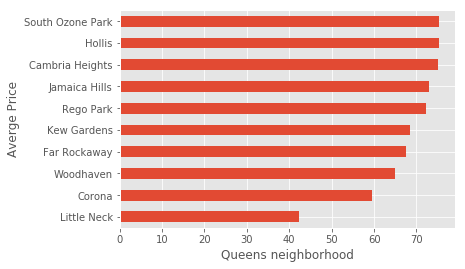

In [45]:
#What is the average price of room according to Queens and its neighborhood ?
df_Queens_Price=df_borough_Q.groupby("neighbourhood")["price"].mean().sort_values().head(10)
df_Queens_Price.plot(kind='barh')
plt.ylabel('Averge Price')
plt.xlabel('Queens neighborhood')

Text(0, 0.5, 'Queens neighborhood')

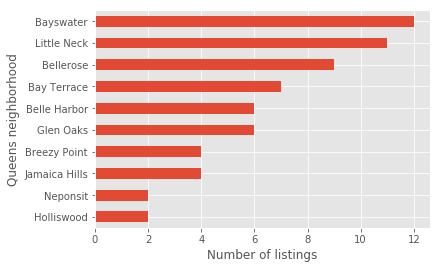

In [46]:
#What is the average price of room according to Queens and its neighborhood ?
df_Manhattan_Price=df_borough_Q.groupby("neighbourhood")["count_listings"].sum().sort_values(ascending=True).head(10)
df_Manhattan_Price.plot(kind='barh')
plt.xlabel('Number of listings')
plt.ylabel('Queens neighborhood')

Text(0, 0.5, 'Queens neighborhood')

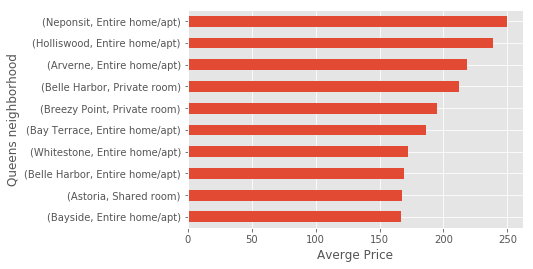

In [47]:
#What is the average price of room type according to Queens and its neighborhood ?
df_Manhattan_Price=df_borough_Q.groupby(["neighbourhood","room_type"])["price"].mean().nlargest(10).sort_values()
df_Manhattan_Price.plot(kind='barh')
plt.xlabel('Averge Price')
plt.ylabel('Queens neighborhood')

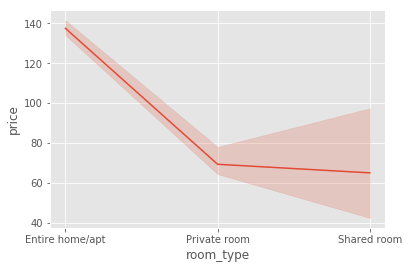

In [48]:
#which type of room has highest price for Queens borough
sns.lineplot(x='room_type', y='price', data=df_borough_Q)

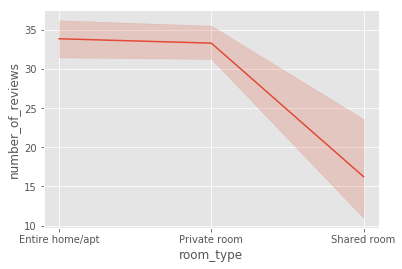

In [49]:
#which type of room has highest pricemore number of reviews for Queens borough
sns.lineplot(x='room_type', y='number_of_reviews', data=df_borough_Q)

# Ploting data on maps

In [50]:
#create geometry column from lat and lon
from shapely.geometry import Point,Polygon
geometry=[Point(xy) for xy in zip(df_listings.longitude, df_listings.latitude)]
geometry[:5]

In [51]:
gdf = GeoDataFrame(
    df_listings, geometry=geometry)
gdf[:10]

id                                               name   host_id  \
0   1742654                High Floor apt.near Columbus Circle   9173924   
1  23502842                           Cozy East Village studio  34777741   
2  15984984                          Great Location by Subway!   9737900   
3  13820083   Beautiful Cozy Garden Apt- Historic Clinton Hill  31829334   
4   6170979                 Cozy 1 Bedroom apartment fitting 4  31104121   
5  27283214                  Room in Luxury Building - Midtown   3508466   
6  30712669        Safe perfect location heart of east village   7957807   
7     33014                                            NYC Zen    143048   
8  29705049  Sunny, Cozy Apt in the Heart of BedStuy for Cheap     82286   
9    867749      Sunny 2 bedroom in Prospect heights + terrace    745186   

   host_name    borough       neighbourhood  latitude  longitude  \
0        Jon  Manhattan      Hell's Kitchen  40.76708  -73.98600   
1    Tiffany  Manhattan        East Village  40.72205  -73.98132   
2       Nilu   Brooklyn        Clinton Hill  40.68252  -73.96436   
3    Maritza   Brooklyn        Clinton Hill  40.68421  -73.96631   
4  Alexander   Brooklyn        Clinton Hill  40.68678  -73.96044   
5     Jeremy  Manhattan      Hell's Kitchen  40.76507  -73.98467   
6    Matheus  Manhattan        East Village  40.72560  -73.98478   
7      Paula  Manhattan        East Village  40.72354  -73.98295   
8      Linda   Brooklyn  Bedford-Stuyvesant  40.68615  -73.93560   
9     Chiara   Brooklyn       Crown Heights  40.67813  -73.96355   

         room_type  price  minimum_nights  number_of_reviews date_reviewed  \
0  Entire home/apt    200               2                114    2019-04-15   
1  Entire home/apt    159               2                  8    2018-09-08   
2  Entire home/apt    180               4                 36    2019-04-30   
3  Entire home/apt     99              30                  9    2019-01-31   
4  Entire home/apt    100               3                122    2019-04-20   
5     Private room     75               5                  3    2018-11-23   
6  Entire home/apt    200               2                  9    2019-05-03   
7  Entire home/apt    195               3                 28    2018-12-30   
8  Entire home/apt     79               5                  1    2018-11-14   
9  Entire home/apt    200              30                  1    2015-07-19   

   reviews_per_month  count_listings  availability_365    year  month  \
0               1.87               1               204  2019.0    4.0   
1               0.66               1                10  2018.0    9.0   
2               1.24               1                10  2019.0    4.0   
3               0.27               2                51  2019.0    1.0   
4               2.63               1               257  2019.0    4.0   
5               0.32               1                19  2018.0   11.0   
6               2.13               1               358  2019.0    5.0   
7               0.27               1               208  2018.0   12.0   
8               0.17               1                93  2018.0   11.0   
9               0.02               1               247  2015.0    7.0   

                              geometry  
0             POINT (-73.986 40.76708)  
1           POINT (-73.98132 40.72205)  
2           POINT (-73.96436 40.68252)  
3  POINT (-73.96630999999999 40.68421)  
4  POINT (-73.96044000000001 40.68678)  
5  POINT (-73.98466999999999 40.76507)  
6            POINT (-73.98478 40.7256)  
7           POINT (-73.98295 40.72354)  
8  POINT (-73.93559999999999 40.68615)  
9           POINT (-73.96355 40.67813)

In [52]:
#Sample of dataset
gdf_sample=gdf.sample(n=10000,random_state=25,axis=0)
gdf_sample.head()

id                                      name    host_id  \
20676  28811035                            New York House  217293060   
17666   9662070         Large private bedroom in bushwick     506208   
40031  21935569  Tiny (but comfy!) Private room Manhattan   43352661   
29957  17540291  One bedroom Apartment in Carroll Gardens    2063421   
19549   6371504       Sunny Upper West Side Summer Rental   26484511   

      host_name    borough       neighbourhood  latitude  longitude  \
20676     Mohan  Manhattan   Greenwich Village  40.73278  -73.99712   
17666      Erin   Brooklyn            Bushwick  40.70435  -73.91646   
40031   Charles  Manhattan  Washington Heights  40.84344  -73.93922   
29957     Megan   Brooklyn     Carroll Gardens  40.67522  -73.99853   
19549     Emily  Manhattan     Upper West Side  40.78293  -73.97667   

             room_type  price  minimum_nights  number_of_reviews  \
20676  Entire home/apt    175              90                  0   
17666     Private room     65               1                  2   
40031     Private room     20               2                 15   
29957  Entire home/apt    125               1                  0   
19549  Entire home/apt    175               3                  4   

      date_reviewed  reviews_per_month  count_listings  availability_365  \
20676           NaT                NaN               4               274   
17666    2016-07-24               0.06               1                 0   
40031    2019-04-18               0.88               3                69   
29957           NaT                NaN               1                 0   
19549    2016-06-18               0.09               1                 0   

         year  month                             geometry  
20676     NaN    NaN           POINT (-73.99712 40.73278)  
17666  2016.0    7.0           POINT (-73.91646 40.70435)  
40031  2019.0    4.0  POINT (-73.93921999999999 40.84344)  
29957     NaN    NaN           POINT (-73.99853 40.67522)  
19549  2016.0    6.0           POINT (-73.97667 40.78293)

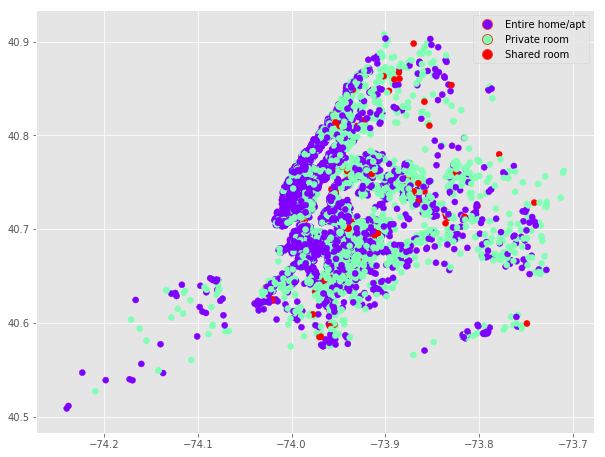

In [53]:
#Room type for all boroughs
ax=gdf_sample.plot(column="room_type",categorical=True,figsize=(10,10),cmap="rainbow",legend=True)
ax

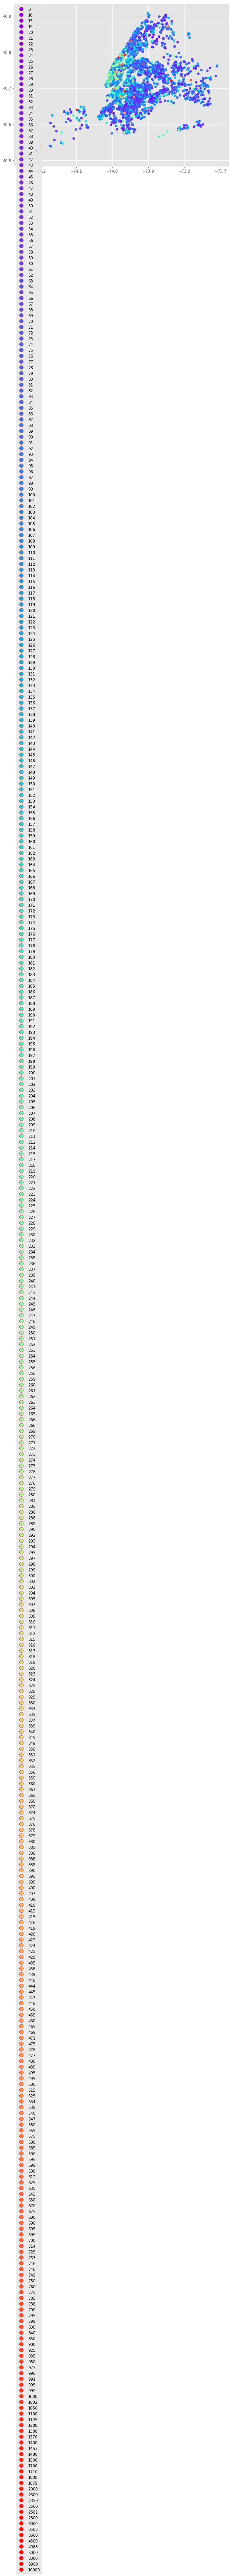

In [54]:
ax=gdf_sample.plot(column="price",categorical=True,figsize=(10,10),cmap="rainbow",legend=True)

ax

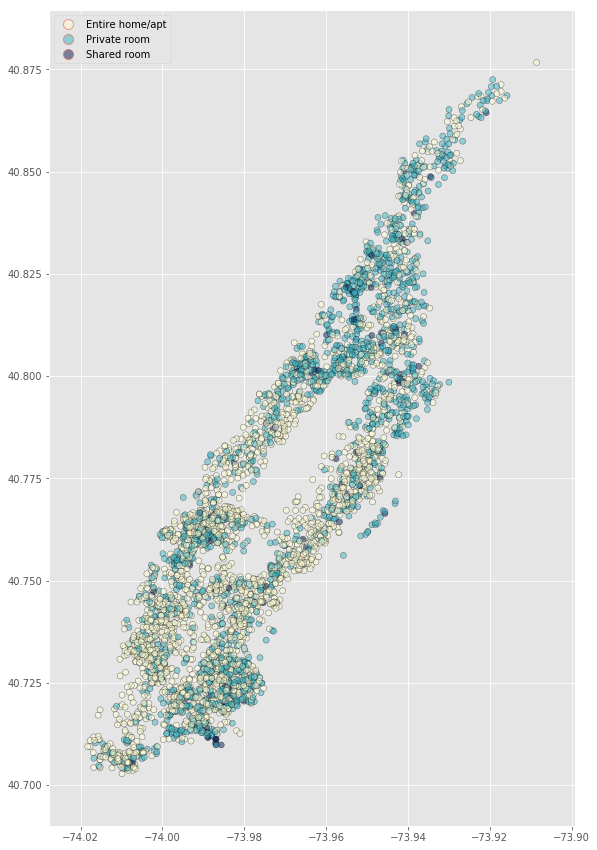

In [55]:
#Room_type for Manhattan
ax=gdf_sample[gdf_sample.borough=="Manhattan"].plot(column="room_type",edgecolor="K",
                                             figsize=(15,15),cmap="YlGnBu",alpha=0.5,legend=True)

#ax.set_axis_off()


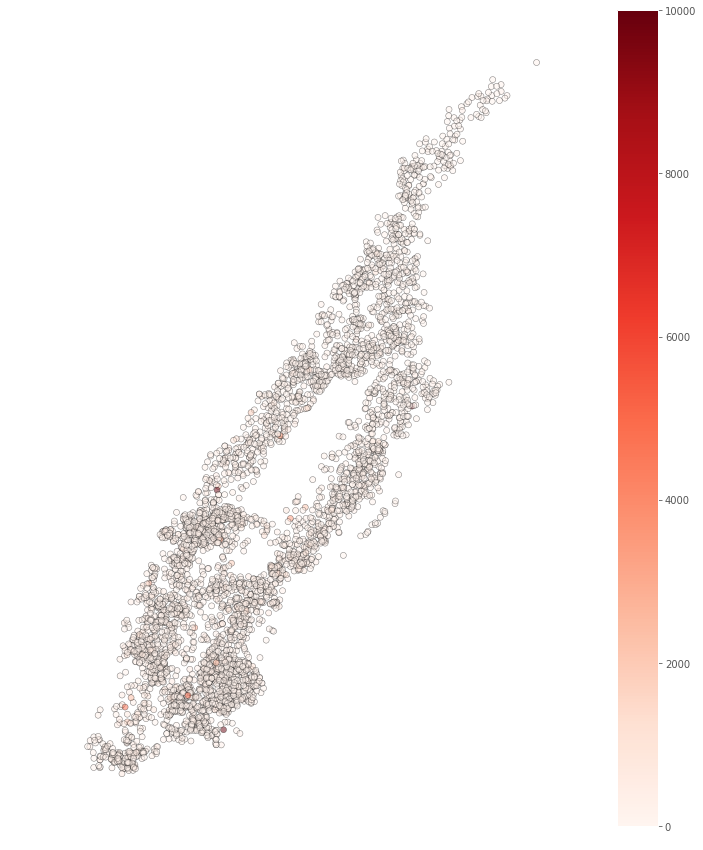

In [56]:
#Price of rooms for Manhattan
ax=gdf_sample[gdf_sample.borough=="Manhattan"].plot(column="price",edgecolor="K",
                                             figsize=(15,15),cmap="Reds",alpha=0.5,legend=True)
ax.set_axis_off()


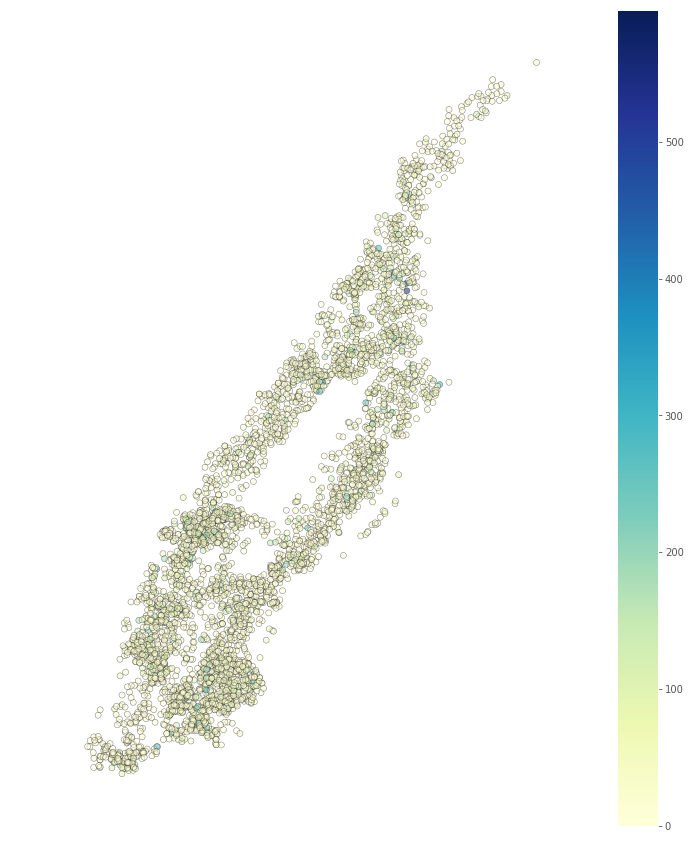

In [57]:
#Number of reviews for Manhattan
ax=gdf_sample[gdf_sample.borough=="Manhattan"].plot(column="number_of_reviews",edgecolor="K",
                                             figsize=(15,15),cmap="YlGnBu",alpha=0.5,legend=True)
ax.set_axis_off()


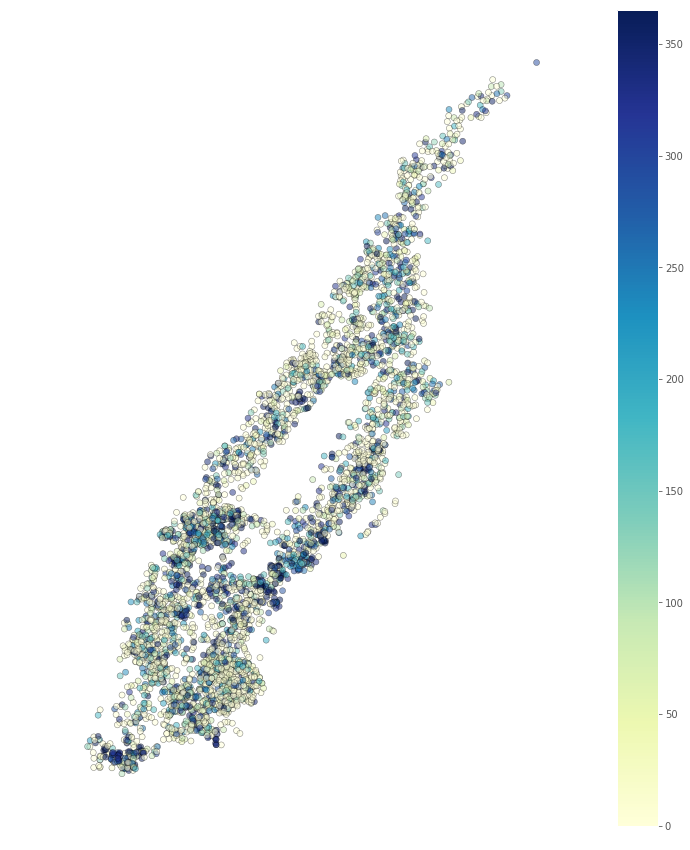

In [58]:
#Number of reviews for Manhattan
ax=gdf_sample[gdf_sample.borough=="Manhattan"].plot(column="availability_365",edgecolor="K",
                                             figsize=(15,15),cmap="YlGnBu",alpha=0.5,legend=True)
ax.set_axis_off()


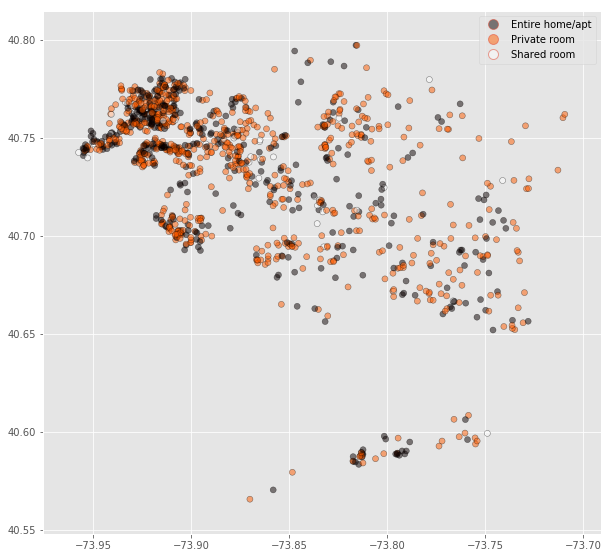

In [74]:
#available room types for queens borough
ax=gdf_sample[gdf_sample.borough=="Queens"].plot(column="room_type",edgecolor="K",
                                             figsize=(10,10),cmap="hot",alpha=0.5,legend=True)
ax
#ax.set_axis_off()

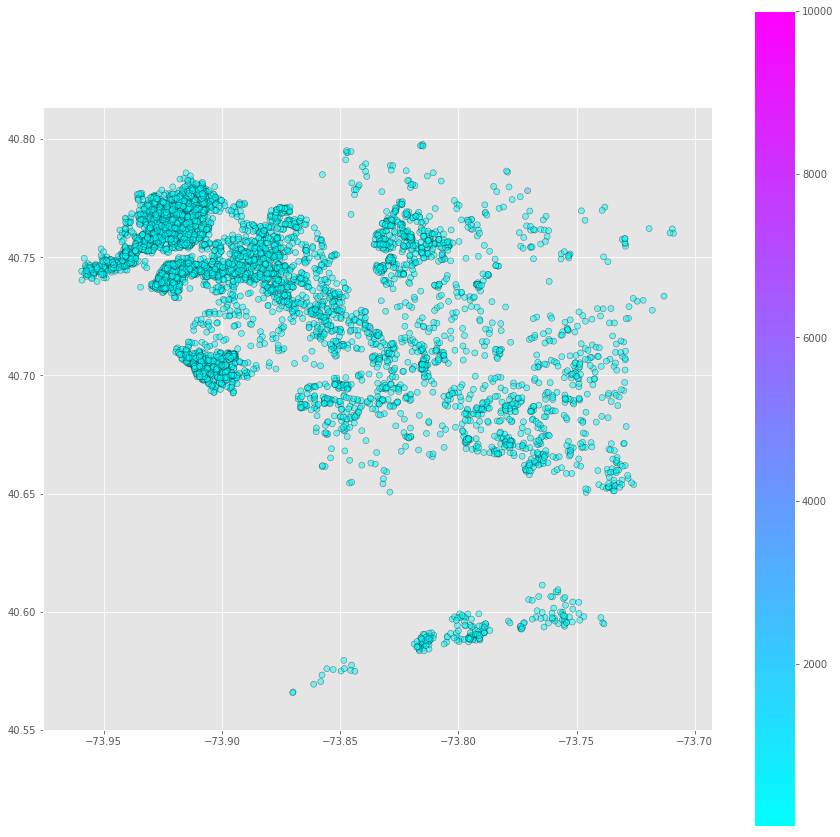

In [73]:
#Price of rooms in Queens
ax=gdf[gdf.borough=="Queens"].plot(column="price",edgecolor="K",
                                             figsize=(15,15),cmap="cool",alpha=0.5,legend=True)
ax
#ax.set_axis_off()


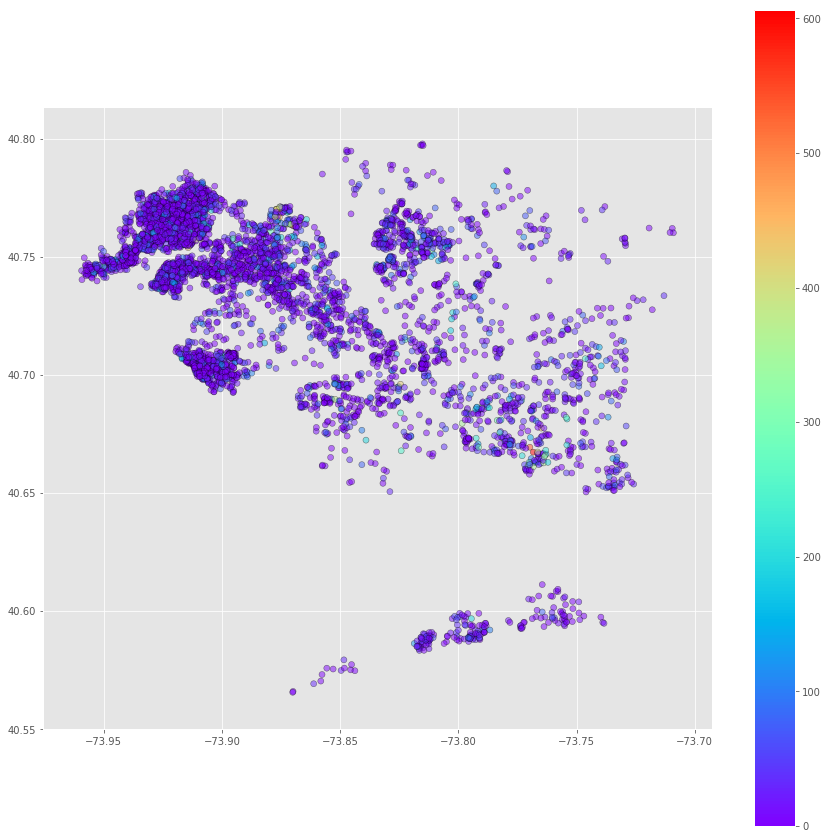

In [72]:
#number of reviews from Queens
ax=gdf[gdf.borough=="Queens"].plot(column="number_of_reviews",edgecolor="K",
                                             figsize=(15,15),cmap="rainbow",alpha=0.5,legend=True)
ax
#ax.set_axis_off()


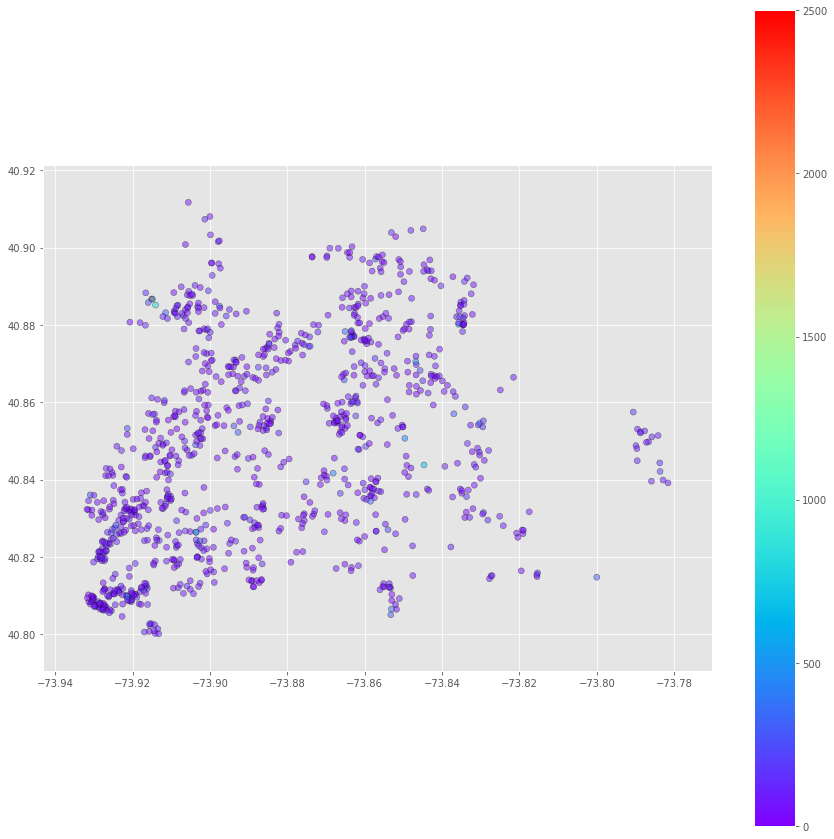

In [70]:
#Price of rooms in Bronx 
ax=gdf[gdf.borough=="Bronx"].plot(column="price",edgecolor="K",
                                             figsize=(15,15),cmap="rainbow",alpha=0.5,legend=True)
ax
#ax.set_axis_off()


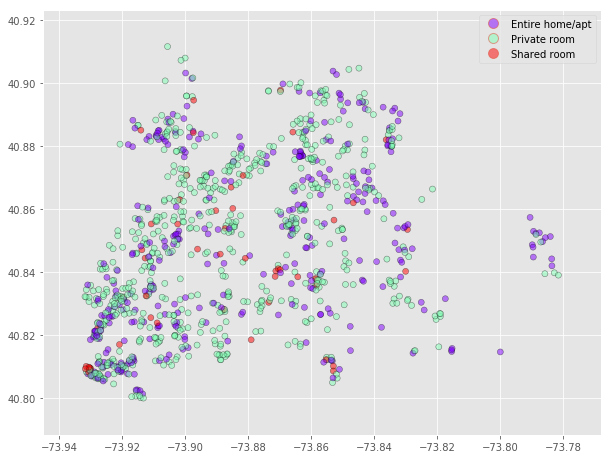

In [66]:
#Available Room type in Bronx
ax=gdf[gdf.borough=="Bronx"].plot(column="room_type",edgecolor="K",
                                             figsize=(10,10),cmap="rainbow",alpha=0.5,legend=True)
ax
#ax.set_axis_off()

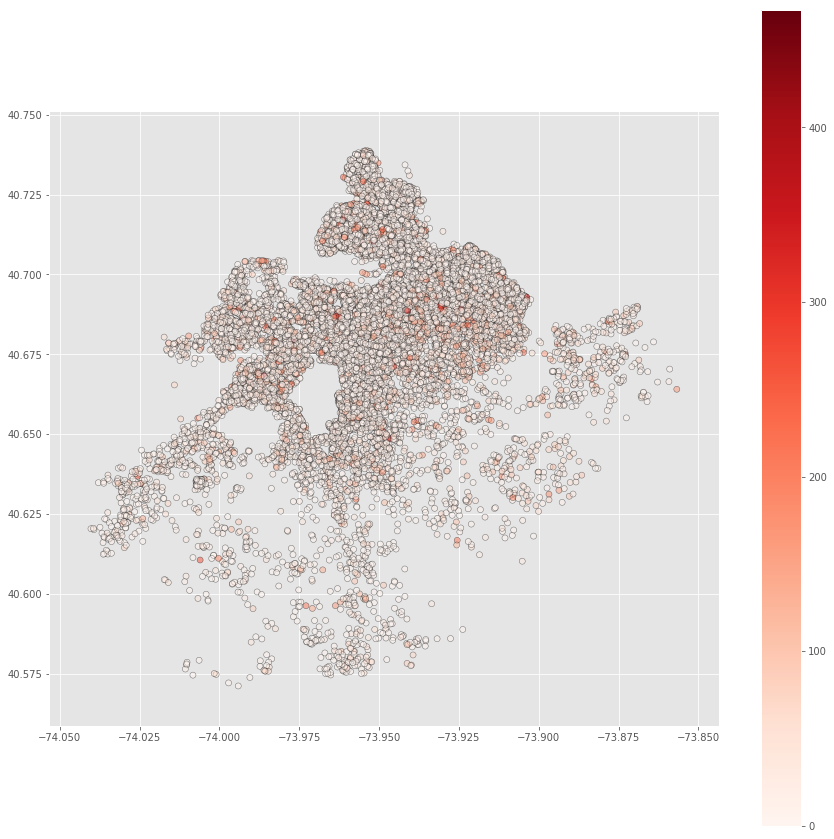

In [67]:
#number of reviews for Brooklyn
ax=gdf[gdf.borough=="Brooklyn"].plot(column="number_of_reviews",edgecolor="K",
                                             figsize=(15,15),cmap="Reds",alpha=0.5,legend=True)
ax
#ax.set_axis_off()


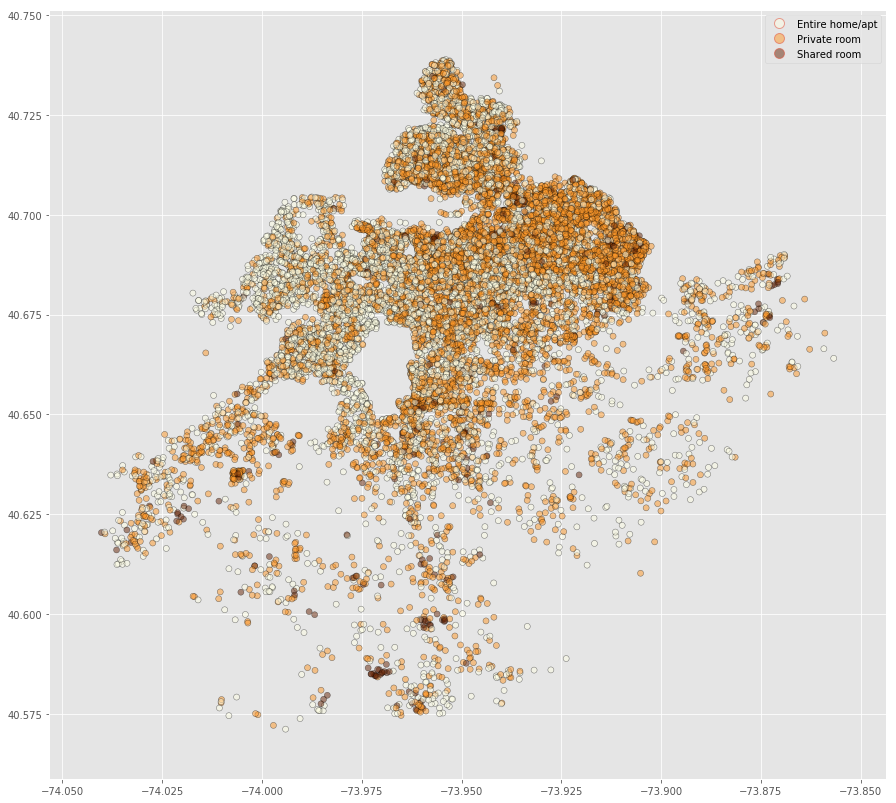

In [68]:
ax=gdf[gdf.borough=="Brooklyn"].plot(column="room_type",edgecolor="K",
                                             figsize=(15,15),cmap="YlOrBr",alpha=0.5,legend=True)
ax
#ax.set_axis_off()
